In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Amazon_Products.csv",low_memory=False)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.shape

(10004, 895)

In [4]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
drop_in=[]
for i in range(0,895):

    if(df[df.columns[i]].isna().sum()>5000):
        drop_in.append(i)
df = df.drop(df.columns[drop_in],axis = 1)
df.reset_index(drop=True, inplace=True)

In [6]:
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN
10000,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...
10001,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...
10002,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN


In [7]:
df.isna().sum()

uniq_id                                           2
product_name                                      2
manufacturer                                      9
price                                          1437
number_available_in_stock                      2502
number_of_reviews                                20
number_of_answered_questions                    767
average_review_rating                            20
amazon_category_and_sub_category                692
description                                     653
product_information                              61
product_description                             654
items_customers_buy_after_viewing_this_item    3068
dtype: int64

In [8]:
df.drop([2002,2004],inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
def ReturnFirstValuePrice(value):
    value=value.split()
    values=value[0][1:-1]
    return values
def ReturnFirstValue(value):
    value=value.split()
    values=value[0]
    return values
def ReturnLastValue(value):
    value=value.split()
    values=value[-1]
    return values

In [10]:
def FloatChecker(array):
    flag=0
    for i in range(0,len(array)):
        try:
            array[i]=float(array[i])
        except:
            print(i)
            print(array[i])
            flag+=1
    if(flag==0):
        print("Ready to be converted to float")

In [11]:
def AllTermsShower(array):
    for i in range(0,len(array)):
        print(array[i])

In [12]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item'],
      dtype='object')

## Price Column Handling


In [13]:
df.price=df.price.astype(str)

#df.dropna(subset='price',inplace=True)
#df.reset_index(drop=True, inplace=True)
df.price=df.price.apply(ReturnFirstValue)


In [14]:
df.price

0         £3.42
1        £16.99
2         £9.99
3        £39.99
4        £32.19
          ...  
9997     £22.95
9998     £39.99
9999     £43.99
10000    £49.81
10001    £21.20
Name: price, Length: 10002, dtype: object

In [15]:
df.price=df.price.apply(ReturnFirstValuePrice)

In [16]:
null_price=df[(df['price']=="a")].index
null_price

Int64Index([   9,   14,   15,   16,   17,   25,   27,   28,   33,   38,
            ...
            9928, 9929, 9932, 9936, 9941, 9954, 9971, 9978, 9985, 9986],
           dtype='int64', length=1435)

In [17]:
non_null_price=df[(df.price.notna())].index

In [18]:
df.price[null_price]=np.nan

In [19]:
FloatChecker(df.price)

2002
""subtext"":""
2003
""subtext"":""
7096
2,439.9


In [20]:
df.price[2002]=np.nan
df.price[2003]=np.nan
df.price[7096]=float(2439.9)

In [21]:
FloatChecker(df.price)

Ready to be converted to float


In [22]:
df.price=df.price.astype(float)

In [23]:
df.price[(df.price==0)]=np.nan

In [24]:
df.price.skew()

21.41156903996521

In [25]:
df.describe()

,price
count,8564.000000
mean,20.223681
std,46.348695
min,0.200000
25%,4.900000
50%,10.600000
75%,19.900000
max,2439.900000


In [26]:
df.price.mean()

20.223680523120038

In [27]:
df.price[(df.price==0)]=np.nan

In [28]:

df.price=df.price.fillna(df.price[non_null_price].mean())

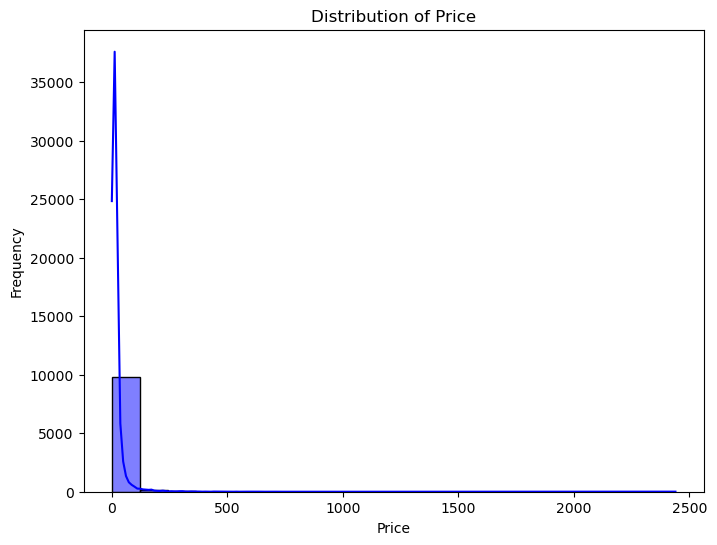

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins=20, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Most Expensive Items

In [160]:
for i in range (0,5):
    print(df.sort_values(by='price',ascending=False).product_name[i]+" : "+str(df.sort_values(by='price',ascending=False).price[i]))

Hornby 2014 Catalogue : 3.4
FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke : 16.9
CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY : 9.9
HORNBY Coach R4410A BR Hawksworth Corridor 3rd : 39.9
Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model : 32.1


In [31]:
df[(df.price>100)].count()

uniq_id                                        218
product_name                                   218
manufacturer                                   218
price                                          218
number_available_in_stock                      144
number_of_reviews                              217
number_of_answered_questions                   210
average_review_rating                          217
amazon_category_and_sub_category               208
description                                    209
product_information                            217
product_description                            209
items_customers_buy_after_viewing_this_item    101
dtype: int64

In [32]:
price_75=np.percentile(df.price,75)
price_25=np.percentile(df.price,25)
iqr_pri=price_75-price_25
upper_pri=df.price.mean()+1.5*iqr_pri


df.price[df[(df.price>100)].index]=100


In [33]:
df.price.describe()

count    10002.000000
mean        17.806784
std         19.151878
min          0.200000
25%          5.900000
50%         12.900000
75%         20.223681
max        100.000000
Name: price, dtype: float64

In [34]:
df.price.skew()

2.5856383679779693

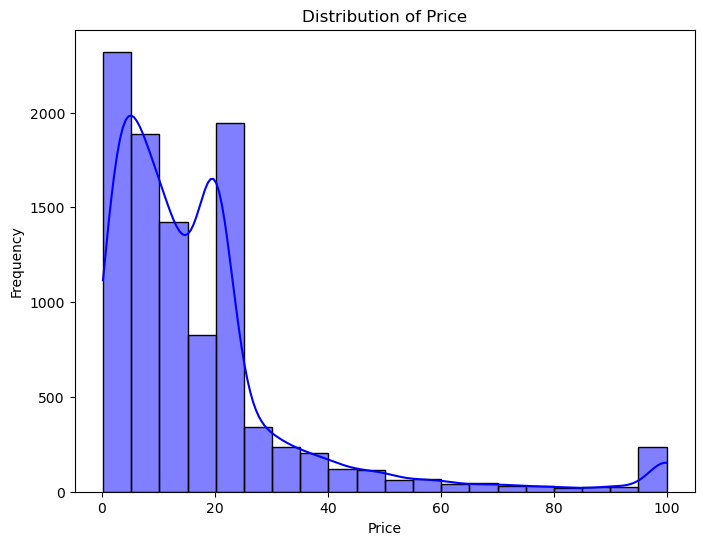

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins=20, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [36]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                             0
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
description                                     651
product_information                              59
product_description                             652
items_customers_buy_after_viewing_this_item    3066
dtype: int64

## Average Review Rating Column


In [37]:
df.average_review_rating=df.average_review_rating.astype(str)


In [38]:
df.average_review_rating=df.average_review_rating.apply(ReturnFirstValue)

In [39]:
df.average_review_rating

0        4.9
1        4.5
2        3.9
3        5.0
4        4.7
        ... 
9997     5.0
9998     4.0
9999     5.0
10000    5.0
10001    4.5
Name: average_review_rating, Length: 10002, dtype: object

In [40]:
df.average_review_rating[2002]=np.nan
df.average_review_rating[2003]=np.nan

In [41]:
FloatChecker(df.average_review_rating)

Ready to be converted to float


In [42]:
df.average_review_rating=df.average_review_rating.astype(float)

In [43]:
df.average_review_rating.median()

5.0

In [44]:
df.average_review_rating.skew()

-0.9429479144256939

In [45]:
df.average_review_rating=df.average_review_rating.fillna(df.average_review_rating.mean())

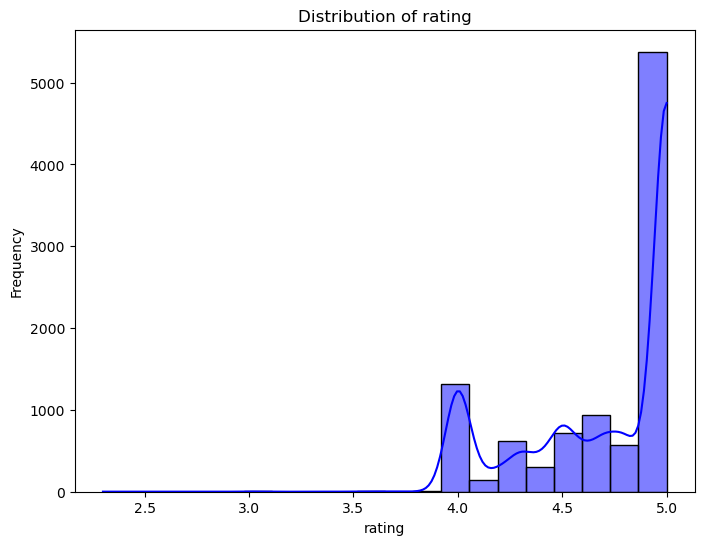

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='average_review_rating', bins=20, kde=True, color='blue')
plt.title('Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

In [47]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                             0
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                             0
amazon_category_and_sub_category                690
description                                     651
product_information                              59
product_description                             652
items_customers_buy_after_viewing_this_item    3066
dtype: int64

## Number of reviews


In [48]:
df.number_of_reviews=df.number_of_reviews.astype(str)


In [49]:
df.number_of_reviews

0        15
1         2
2        17
3         1
4         3
         ..
9997      3
9998      1
9999      1
10000     1
10001    11
Name: number_of_reviews, Length: 10002, dtype: object

In [50]:
FloatChecker(df.number_of_reviews)

2002
subtextKey"":""android-tagline""
2003
subtextKey"":""android-tagline""
8874
1,040
9317
1,399


In [51]:
df.number_of_reviews[8874]=float(1040)
df.number_of_reviews[9317]=float(1399)
df.number_of_reviews[2002]=np.nan
df.number_of_reviews[2003]=np.nan

In [52]:
FloatChecker(df.number_of_reviews)

Ready to be converted to float


In [53]:
df.number_of_reviews=df.number_of_reviews.astype(float)

In [54]:
df.number_of_reviews=df.number_of_reviews.fillna(df.number_of_reviews.mean())

In [55]:
nor_75=np.percentile(df.number_of_reviews,75)
nor_25=np.percentile(df.number_of_reviews,25)
iqr_nor=nor_75-nor_25
upper_nor=df.number_of_reviews.mean()+1.5*iqr_nor


df.number_of_reviews[df[(df.number_of_reviews>upper_pri)].index]=upper_nor


In [56]:
df.number_of_reviews.skew()

2.346461610836545

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10002 non-null  object 
 1   product_name                                 10002 non-null  object 
 2   manufacturer                                 9995 non-null   object 
 3   price                                        10002 non-null  float64
 4   number_available_in_stock                    7502 non-null   object 
 5   number_of_reviews                            10002 non-null  float64
 6   number_of_answered_questions                 9237 non-null   object 
 7   average_review_rating                        10002 non-null  float64
 8   amazon_category_and_sub_category             9312 non-null   object 
 9   description                                  9351 non-null   object 
 10

## Available in stock column


In [58]:
df.number_available_in_stock=df.number_available_in_stock.astype(str)

In [59]:

null_available=df[(df.number_available_in_stock=="nan")].index
df.number_available_in_stock=df.number_available_in_stock.apply(ReturnFirstValue)

In [60]:
df.number_available_in_stock[null_available]=str(0)

In [61]:
FloatChecker(df.number_available_in_stock)

2002
text"":""Appstore
2003
text"":""Appstore


In [62]:

df.number_available_in_stock[2002]=float(0)
df.number_available_in_stock[2003]=float(0)

In [63]:
df.number_available_in_stock=df.number_available_in_stock.astype(float)

In [64]:
df.number_available_in_stock.skew()

2.96239774186609

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10002 non-null  object 
 1   product_name                                 10002 non-null  object 
 2   manufacturer                                 9995 non-null   object 
 3   price                                        10002 non-null  float64
 4   number_available_in_stock                    10002 non-null  float64
 5   number_of_reviews                            10002 non-null  float64
 6   number_of_answered_questions                 9237 non-null   object 
 7   average_review_rating                        10002 non-null  float64
 8   amazon_category_and_sub_category             9312 non-null   object 
 9   description                                  9351 non-null   object 
 10

## Number of answered questions

In [66]:

df.number_of_answered_questions=df.number_of_answered_questions.astype(str)
null_answered=df[(df.number_available_in_stock=="nan")].index
df.number_of_answered_questions[null_answered]="0"

In [67]:
df.number_of_answered_questions[2002]=np.nan
df.number_of_answered_questions[2003]=np.nan

In [68]:
FloatChecker(df.number_of_answered_questions)

Ready to be converted to float


In [69]:
df.number_of_answered_questions=df.number_of_answered_questions.astype(float)

In [70]:
df.number_of_answered_questions.skew()

7.820504844160154

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10002 non-null  object 
 1   product_name                                 10002 non-null  object 
 2   manufacturer                                 9995 non-null   object 
 3   price                                        10002 non-null  float64
 4   number_available_in_stock                    10002 non-null  float64
 5   number_of_reviews                            10002 non-null  float64
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        10002 non-null  float64
 8   amazon_category_and_sub_category             9312 non-null   object 
 9   description                                  9351 non-null   object 
 10

In [72]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                             0
number_available_in_stock                         0
number_of_reviews                                 0
number_of_answered_questions                    767
average_review_rating                             0
amazon_category_and_sub_category                690
description                                     651
product_information                              59
product_description                             652
items_customers_buy_after_viewing_this_item    3066
dtype: int64

## Manufacturer

In [73]:
df.dropna(subset='manufacturer', inplace=True,axis=0)
df.reset_index(drop=True,inplace=True)

In [74]:
man_arr=df.manufacturer.unique()
man_arr

array(['Hornby', 'FunkyBuys', 'ccf', ..., 'Captain america', 'IronMan',
       'Super Heroes'], dtype=object)

In [75]:
def handleman(value):
    for i in range(len(man_arr)):
        if(value==man_arr[i]):
            value=i
    return value


In [76]:
df.manufacturer=df.manufacturer.apply(handleman)

In [77]:
df.manufacturer=df.manufacturer.astype(float)

In [78]:
df.shape

(9995, 13)

In [79]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,0.0,3.4,5.0,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,1.0,16.9,0.0,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,2.0,9.9,2.0,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,0.0,39.9,0.0,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,0.0,32.1,0.0,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...


## Category Handling

In [80]:
def handlecateg(value):
    value=value.split(' > ')
    return value
    

In [81]:
df.amazon_category_and_sub_category=df.amazon_category_and_sub_category.astype(str)
df.amazon_category_and_sub_category=df.amazon_category_and_sub_category.apply(handlecateg)

In [82]:
df['category']=1
df['subcategory']=1
for i in range(0,len(df)):
    
    if len(df.amazon_category_and_sub_category[i])>1:
            df['category'][i]=df.amazon_category_and_sub_category[i][0]
            df['subcategory'][i]=df.amazon_category_and_sub_category[i][1]
    if len(df.amazon_category_and_sub_category[i])==1:
            df['category'][i]=np.nan
            df['subcategory'][i]=np.nan


In [83]:
df2=pd.DataFrame()
df2['category']=1
df2['frequency']=1
df2['category']=df.category.unique()
for i in range(0,len(df2)):
    df2['frequency'][i]=len(df[(df.category==df2.category[i])])

In [84]:
df3=pd.DataFrame()
df3['category']=1
df3['frequency']=1
df3['subcategory']=df.subcategory.unique()
for i in range(0,len(df3)):
    df3['frequency'][i]=len(df[(df.subcategory==df3.subcategory[i])])
df3.sort_values(by='frequency',ascending=False)

,category,frequency,subcategory
24,NaN,1100.0,Toy Vehicles & Accessories
31,NaN,592.0,Accessories
20,NaN,485.0,Science Fiction & Fantasy
8,NaN,426.0,Children's Craft Kits
0,NaN,387.0,Model Trains & Railway Sets
...,...,...,...
102,NaN,1.0,Drawing & Painting Supplies
105,NaN,1.0,Pencils
106,NaN,1.0,Pens & Refills
148,NaN,1.0,Drinking Games


In [85]:
df.drop(columns="amazon_category_and_sub_category",inplace=True)

## EDA

In [86]:
df.describe()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
count,9995.000000,9995.000000,9995.000000,9995.000000,9229.000000,9995.000000
mean,852.413907,17.806834,5.938969,5.307464,1.833676,4.707318
std,749.576175,19.155208,8.362873,7.341247,2.516045,0.371865
min,0.000000,0.200000,0.000000,1.000000,1.000000,2.300000
25%,256.000000,5.900000,0.000000,1.000000,1.000000,4.500000
50%,585.000000,12.900000,3.000000,2.000000,1.000000,5.000000
75%,1387.000000,20.223681,7.000000,6.000000,2.000000,5.000000
max,2651.000000,100.000000,92.000000,41.000000,39.000000,5.000000


In [87]:
df.skew()

manufacturer                    0.777199
price                           2.585891
number_available_in_stock       2.961349
number_of_reviews               2.346845
number_of_answered_questions    7.833185
average_review_rating          -0.943923
dtype: float64

In [88]:
df.corr()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
manufacturer,1.000000,-0.060461,-0.127474,-0.032182,-0.020641,0.004019
price,-0.060461,1.000000,0.009975,-0.051491,-0.014033,0.052384
number_available_in_stock,-0.127474,0.009975,1.000000,0.267941,0.016744,-0.020193
number_of_reviews,-0.032182,-0.051491,0.267941,1.000000,0.035236,-0.246317
number_of_answered_questions,-0.020641,-0.014033,0.016744,0.035236,1.000000,-0.025936
average_review_rating,0.004019,0.052384,-0.020193,-0.246317,-0.025936,1.000000


In [89]:
no_of_prod=df.groupby('manufacturer')['product_name'].count().sort_values(ascending=False)
top_no_of_products=no_of_prod.index
print("The top 5 manufacturers with the most number of products are: ")
for i in range(0,5):
    print(man_arr[int(top_no_of_products[i])])

The top 5 manufacturers with the most number of products are: 
LEGO
Disney
Oxford Diecast
Playmobil
Star Wars


In [90]:
top_rated=df.groupby('manufacturer')['average_review_rating'].mean().sort_values(ascending=False)


In [91]:
top_rated.count()

2652

In [92]:
top_rated[(top_rated>4.7)].count()

1489

In [93]:
np.where(man_arr=='LEGO')

(array([275], dtype=int64),)

In [94]:
num1=df[(df['manufacturer']==0)]

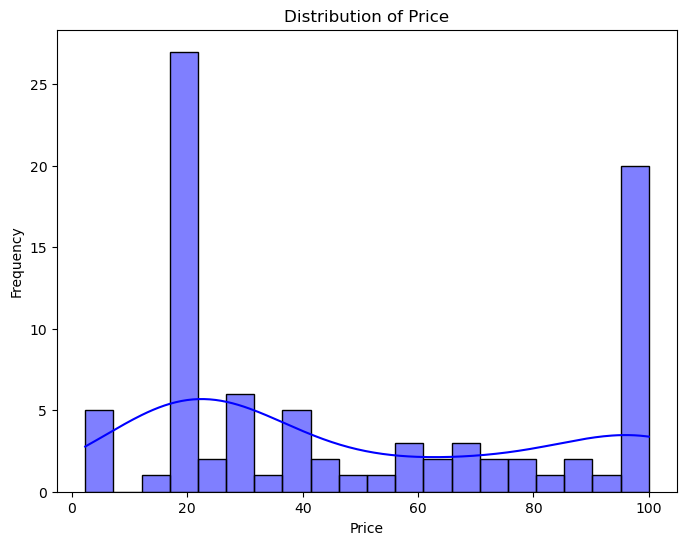

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(data=num1, x='price', bins=20, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [96]:
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,description,product_information,product_description,items_customers_buy_after_viewing_this_item,category,subcategory
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,0.0,3.4,5.0,15.0,1.0,4.9,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Hobbies,Model Trains & Railway Sets
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,1.0,16.9,0.0,2.0,1.0,4.5,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Hobbies,Model Trains & Railway Sets
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,2.0,9.9,2.0,17.0,2.0,3.9,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,Hobbies,Model Trains & Railway Sets
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,0.0,39.9,0.0,1.0,2.0,5.0,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,Hobbies,Model Trains & Railway Sets
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,0.0,32.1,0.0,3.0,2.0,4.7,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Hobbies,Model Trains & Railway Sets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,31.0,22.9,5.0,3.0,3.0,5.0,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Hobbies,Collectible Figures & Memorabilia
9991,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",90.0,39.9,0.0,1.0,3.0,4.0,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,Characters & Brands,Star Wars
9992,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,2358.0,43.9,3.0,1.0,3.0,5.0,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,Novelty & Special Use,Novelty
9993,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,180.0,49.8,3.0,1.0,3.0,5.0,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,Hobbies,Collectible Figures & Memorabilia


In [97]:

#df.to_csv('Amazon_Products_clean.csv', index=False)


In [98]:

#df2.to_csv('Amazon_category.csv', index=False)

#df3.to_csv('Amazon_subcategory.csv', index=False)


In [99]:
np.reshape(man_arr,(1,-1))

array([['Hornby', 'FunkyBuys', 'ccf', ..., 'Captain america', 'IronMan',
        'Super Heroes']], dtype=object)

In [100]:
ManArr=pd.DataFrame(man_arr)

In [101]:
ManArr

,0
0,Hornby
1,FunkyBuys
2,ccf
3,Generic
4,Chuggington
...,...
2647,Feldherr
2648,GGS
2649,Captain america
2650,IronMan


In [102]:
#no_of_prod.to_csv('ManToFreq.csv',index=False)
#ManArr.to_csv('ManArr.csv',index=False)

In [103]:
links=df.items_customers_buy_after_viewing_this_item
links=links.astype('str')

In [104]:
def links_handle(value):
    values=value.split(' | ')
    return values

In [105]:
links=links.apply(links_handle)

In [106]:
len("http://www.amazon.co.uk/")

24

In [107]:
len(df)

9995

In [108]:
for iter in range(0,len(links)):
    i=links[iter]
    try:
        if i[0]!='nan':
            m=i[0].split('/')[3]
            n=m.split('-')
            vr=""
            for iter in range(0,len(n)):
                vr+=n[iter]+" "
            
            
            links[iter]=vr
            
    except:
        print(i)

Hornby R8150 Catalogue 2015 
Train With Tracks Battery Operated x 
Christmas Holiday Express Festive Train Set Toy 
['{""text"":""Fire TV""']
['{""text"":""Fire TV""']


In [109]:
links

0                                            Waddingtons 
1                                         The Creativity 
2                                 Star Comics Stationery 
3                      Playskool Heroes Super Adventures 
4                       Olde Scotland Yard Ltd Lawkeeper 
                              ...                        
9990                                                [nan]
9991    [http://www.amazon.co.uk/Storm-Trooper-Costume...
9992    [http://www.amazon.co.uk/Olde-Scotland-Yard-Lt...
9993                                                [nan]
9994                                                [nan]
Name: items_customers_buy_after_viewing_this_item, Length: 9995, dtype: object

In [110]:
df.items_customers_buy_after_viewing_this_item = links

In [111]:
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,description,product_information,product_description,items_customers_buy_after_viewing_this_item,category,subcategory
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,0.0,3.4,5.0,15.0,1.0,4.9,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Waddingtons,Hobbies,Model Trains & Railway Sets
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,1.0,16.9,0.0,2.0,1.0,4.5,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,The Creativity,Hobbies,Model Trains & Railway Sets
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,2.0,9.9,2.0,17.0,2.0,3.9,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Star Comics Stationery,Hobbies,Model Trains & Railway Sets
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,0.0,39.9,0.0,1.0,2.0,5.0,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Playskool Heroes Super Adventures,Hobbies,Model Trains & Railway Sets
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,0.0,32.1,0.0,3.0,2.0,4.7,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,Olde Scotland Yard Ltd Lawkeeper,Hobbies,Model Trains & Railway Sets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,31.0,22.9,5.0,3.0,3.0,5.0,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,[nan],Hobbies,Collectible Figures & Memorabilia
9991,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",90.0,39.9,0.0,1.0,3.0,4.0,NaN,Technical Details Additional Information AS...,NaN,[http://www.amazon.co.uk/Storm-Trooper-Costume...,Characters & Brands,Star Wars
9992,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,2358.0,43.9,3.0,1.0,3.0,5.0,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,[http://www.amazon.co.uk/Olde-Scotland-Yard-Lt...,Novelty & Special Use,Novelty
9993,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,180.0,49.8,3.0,1.0,3.0,5.0,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,[nan],Hobbies,Collectible Figures & Memorabilia
